In [7]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import time
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.ensemble import RandomForestClassifier

In [2]:
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
feature_names = predict_students_dropout_and_academic_success.metadata.names
df = pd.DataFrame(data=X, columns=feature_names)
print(df.head())

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0     

Model One: Logistic Regression

In [10]:
# Train and time the model
logistic_regression = LogisticRegression()
start = time.time()
logistic_regression.fit(X_train, y_train)
end = time.time()
train_time = (end-start)
print(f"Training Time: {train_time}")

# Test and time the model
test_start = time.time()
test_pred = logistic_regression.predict(X_test)
test_end = time.time()
test_time =  (test_end-test_start)
print(f"Query Time: {test_time}")

# Accuracies
training_accuracy = logistic_regression.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy}")
testing_accuracy = logistic_regression.score(X_test, y_test)
print(f"Testing Accuracy: {testing_accuracy}")

Training Time: 0.07102012634277344
Query Time: 0.0013706684112548828
Training Accuracy: 0.6847498493068114
Testing Accuracy: 0.666365280289331


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Two: Decision Tree

Training Accuracy: 1.00
Testing Accuracy: 0.68
Training Time: 0.026528358459472656
Query Time: 0.0014595985412597656
Manipulated Training Accuracy: 0.87
Manipulated Testing Accuracy: 0.73


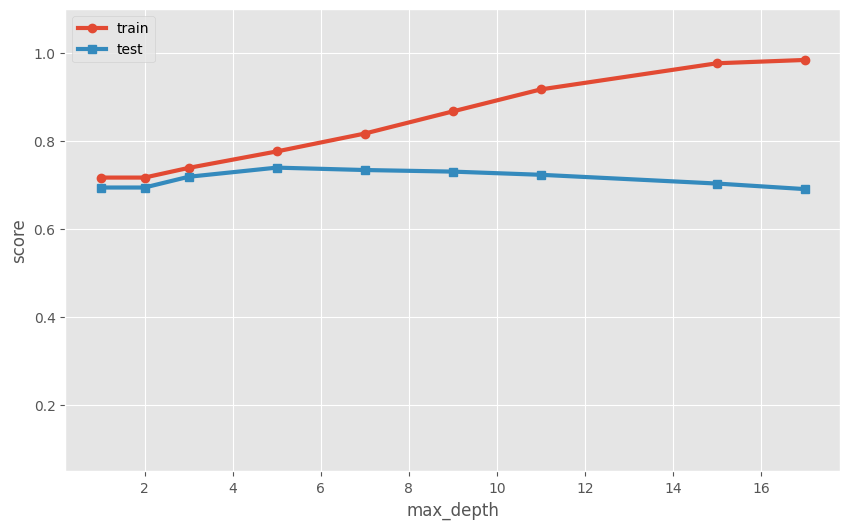

In [13]:
# Default Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
train_score = tree.score(X_train, y_train)
print(f"Training Accuracy: {train_score:.2f}")
test_score = tree.score(X_test, y_test)
print(f"Testing Accuracy: {test_score:.2f}")

# Experimenting with 'max_depth' property
max_depths = np.array([1, 2, 3, 5, 7, 9, 11, 15, 17])
train_score = []
test_score = []
for d in max_depths:
    tree = DecisionTreeClassifier(random_state=42, max_depth=d)
    tree.fit(X_train, y_train)
    testscore = tree.score(X_test, y_test)
    test_score.append(testscore)
    trainscore = tree.score(X_train, y_train)
    train_score.append(trainscore)

# Graphing model complexity curve
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.ylim(0.05, 1.1)
plt.legend()

# New Decision Tree with best 'max_depth'
tree = DecisionTreeClassifier(random_state=42, max_depth=9)

# Train and time the model
start = time.time()
tree.fit(X_train, y_train)
end = time.time()
train_time = (end-start)
print(f"Training Time: {train_time}")

# Test and time the model
test_start = time.time()
test_pred = tree.predict(X_test)
test_end = time.time()
test_time =  (test_end-test_start)
print(f"Query Time: {test_time}")

# New Accuracy
train_score = tree.score(X_train, y_train)
print(f"Manipulated Training Accuracy: {train_score:.2f}")
test_score = tree.score(X_test, y_test)
print(f"Manipulated Testing Accuracy: {test_score:.2f}")

Model Three: K-Nearest Neighbors

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Manhattan Training Time: 0.003958940505981445
Manhattan Query Time: 0.13752317428588867
Manhattan Training Accuracy: 0.7103676913803496
Manhattan Testing Accuracy: 0.6573236889692586
Euclidean Training Time: 0.0038509368896484375
Euclidean Query Time: 0.056128501892089844


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Euclidean Training Accuracy: 0.6675708257986739
Euclidean Testing Accuracy: 0.6148282097649186
Cityblock Training Time: 0.003789186477661133
Cityblock Query Time: 0.13886666297912598


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Cityblock Training Accuracy: 0.7103676913803496
Cityblock Testing Accuracy: 0.6573236889692586


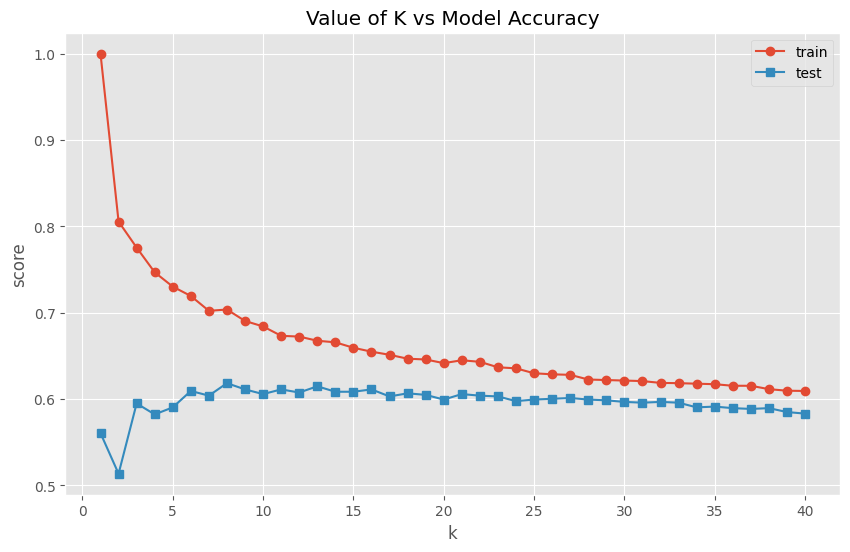

In [17]:
# Choosing best value for k
ks = range(1,41)
train_score = []
test_score = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_pred= knn.predict(X_train)
    current_train_score = metrics.accuracy_score(y_train, train_pred)
    train_score.append(current_train_score)
    test_pred = knn.predict(X_test)
    current_test_score = metrics.accuracy_score(y_test, test_pred)
    test_score.append(current_test_score)

# Graphing model complexity curve
plt.figure(figsize=(10, 6))
plt.plot(ks , train_score, 'o-', label='train')
plt.plot(ks , test_score, 's-', label='test')
plt.xlabel('k')
plt.ylabel('score')
plt.title('Value of K vs Model Accuracy')
plt.legend()

# MANHATTAN METRIC
m_knn = KNeighborsClassifier(n_neighbors=13, metric='manhattan')
# Train and time the model
start = time.time()
m_knn.fit(X_train, y_train)
end = time.time()
train_time = (end-start)
print(f"Manhattan Training Time: {train_time}")
# Test and time the model
test_start = time.time()
test_pred = m_knn.predict(X_test)
test_end = time.time()
test_time =  (test_end-test_start)
print(f"Manhattan Query Time: {test_time}")
# Accuracies
training_accuracy = m_knn.score(X_train, y_train)
print(f"Manhattan Training Accuracy: {training_accuracy}")
testing_accuracy = m_knn.score(X_test, y_test)
print(f"Manhattan Testing Accuracy: {testing_accuracy}")

# EUCLIDEAN METRIC
e_knn = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
# Train and time the model
start = time.time()
e_knn.fit(X_train, y_train)
end = time.time()
train_time = (end-start)
print(f"Euclidean Training Time: {train_time}")
# Test and time the model
test_start = time.time()
test_pred = e_knn.predict(X_test)
test_end = time.time()
test_time =  (test_end-test_start)
print(f"Euclidean Query Time: {test_time}")
# Accuracies
training_accuracy = e_knn.score(X_train, y_train)
print(f"Euclidean Training Accuracy: {training_accuracy}")
testing_accuracy = e_knn.score(X_test, y_test)
print(f"Euclidean Testing Accuracy: {testing_accuracy}")

# CITYBLOCK METRIC
c_knn = KNeighborsClassifier(n_neighbors=13, metric='cityblock')
# Train and time the model
start = time.time()
c_knn.fit(X_train, y_train)
end = time.time()
train_time = (end-start)
print(f"Cityblock Training Time: {train_time}")
# Test and time the model
test_start = time.time()
test_pred = c_knn.predict(X_test)
test_end = time.time()
test_time =  (test_end-test_start)
print(f"Cityblock Query Time: {test_time}")
# Accuracies
training_accuracy = c_knn.score(X_train, y_train)
print(f"Cityblock Training Accuracy: {training_accuracy}")
testing_accuracy = c_knn.score(X_test, y_test)
print(f"Cityblock Testing Accuracy: {testing_accuracy}")

Model Four: Random Forest

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Training Time: 0.25772690773010254
Query Time: 0.008369207382202148
Random Forest's Training Accuracy: 0.776
Random Forest's Testing Accuracy: 0.750


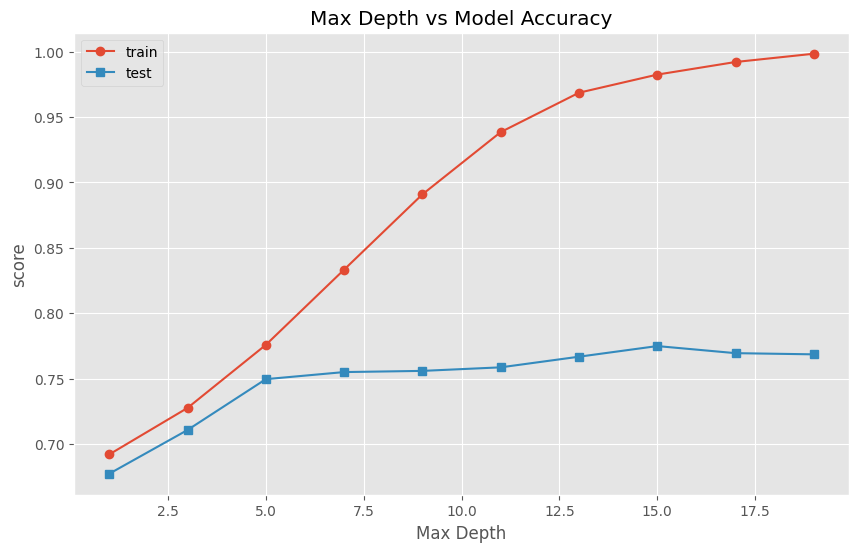

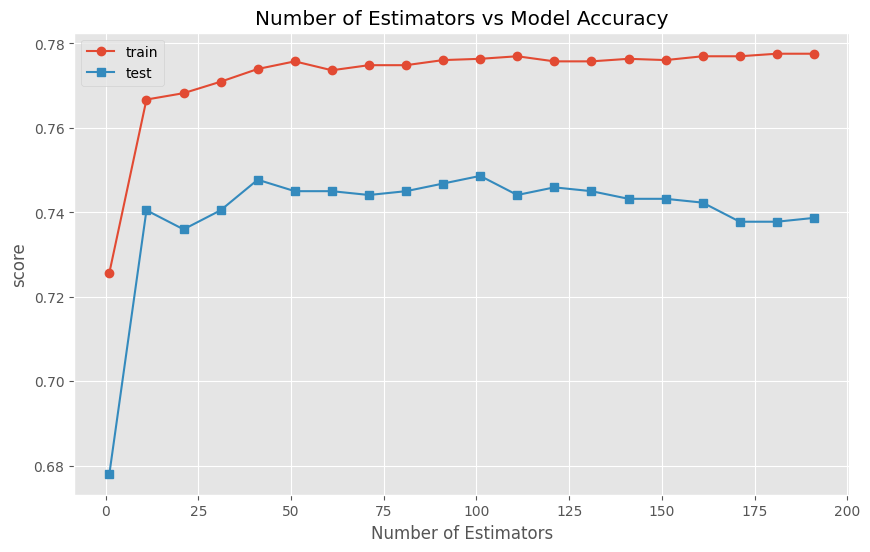

In [18]:
# Choose best value for 'max_depth'
train_score = []
test_score = []
ks = range(1,20,2)
for i, k in enumerate(ks):
    rf = RandomForestClassifier(random_state = 42, max_depth = k)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test, y_test))

# Graphing model complexity curve
plt.figure(figsize=(10, 6))
plt.plot(ks , train_score, 'o-', label='train')
plt.plot(ks , test_score, 's-', label='test')
plt.xlabel('Max Depth')
plt.ylabel('score')
plt.title('Max Depth vs Model Accuracy')
plt.legend()

# Finding the best 'n-estimators', using optimal 'max_depth'
train_score = []
test_score = []
ns = range(1,200,10)
for i, n in enumerate(ns):
    rf = RandomForestClassifier(random_state = 42, max_depth = 5, n_estimators = n)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test, y_test))

# Graphing model complexity curve
plt.figure(figsize=(10, 6))
plt.plot(ns , train_score, 'o-', label='train')
plt.plot(ns , test_score, 's-', label='test')
plt.xlabel('Number of Estimators')
plt.ylabel('score')
plt.title('Number of Estimators vs Model Accuracy')
plt.legend()

# Using optimal values, create Random Forest
rf = RandomForestClassifier(random_state = 42, max_depth = 5, n_estimators = 100)

# Train and time the model
start = time.time()
rf.fit(X_train, y_train)
end = time.time()
train_time = (end-start)
print(f"Training Time: {train_time}")

# Test and time the model
test_start = time.time()
test_pred = rf.predict(X_test)
test_end = time.time()
test_time =  (test_end-test_start)
print(f"Query Time: {test_time}")

print(f"Random Forest's Training Accuracy: {rf.score(X_train, y_train):.3f}")
print(f"Random Forest's Testing Accuracy: {rf.score(X_test, y_test):.3f}")